In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("churn.csv")

Перечень полей:

• state – штат;

• account length – абонентский стаж;

• area code – код региона;

• phone number – номер телефона;

• international plan – тарифный план для международных звонков;

• voice mail plan – тарифный план для голосовой почты;

• number vmail messages – количество сообщений голосовой почты;

• total day minutes – общая длительность звонков в дневное время (мин);

• total day calls – общее количество звонков в дневное время;

• total day charge – общая стоимость звонков в дневное время;

• total eve minutes – общая длительность звонков в вечернее время (мин);

• total eve calls – общее количество звонков в вечернее время;

• total eve charge – общая стоимость звонков в вечернее время;

• total night minutes – общая длительность звонков в ночное время (мин);

• total night calls – общее количество звонков в ночное время;

• total night charge – общая стоимость звонков в ночное время;

• total intl minutes – общая длительность международных звонков (мин);

• total intl calls – общее количество международных звонков;

• total intl charge – общая стоимость международных звонков;

• number customer service calls – количество звонков в службу поддержки.

• churned – покинул ли клиент компанию

Ваша задача используя pandas ответить на следующие вопросы:
1. Построить гистограмму количества звонков в техническую поддержку
2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)
3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку
4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
5. Вывести top-5 самых много и самых мало говорящих клиентов
6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата
7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark
8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)
9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas (в случае спарка - не надо)
10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке "

In [4]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(5000, 21)

1. Построить гистограмму количества звонков в техническую поддержку

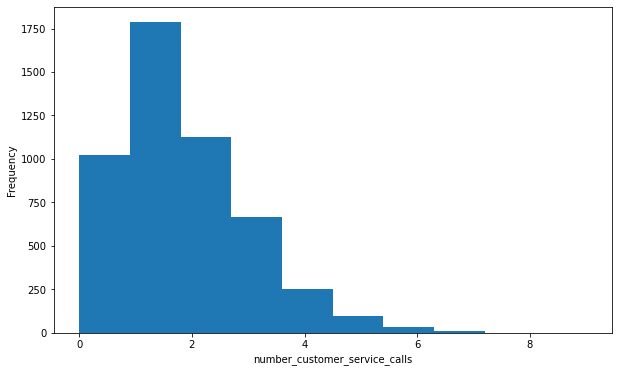

In [16]:
plt.figure(figsize=(10, 6))
df.loc[:, "number_customer_service_calls"].plot.hist(bins=10)
plt.xlabel("number_customer_service_calls");

2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международны)

In [17]:
df["total_minutes"] = df["total_day_minutes"] + df["total_eve_minutes"] + df["total_night_minutes"] + df["total_intl_minutes"]

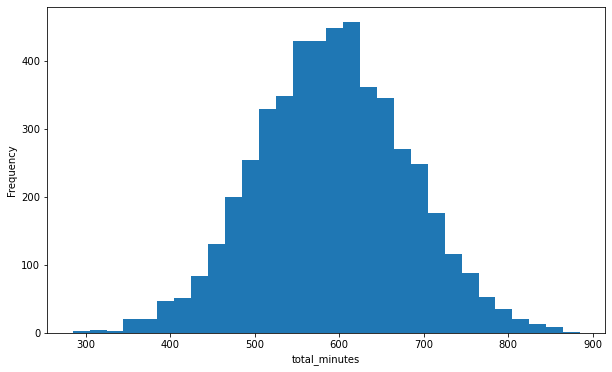

In [21]:
plt.figure(figsize=(10, 6))
df.loc[:, "total_minutes"].plot.hist(bins=30)
plt.xlabel("total_minutes");

3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

total_minutes and number_customer_service_calls

In [133]:
import numpy as np

In [135]:
x_mean = df["total_minutes"].mean()
y_mean = df["number_customer_service_calls"].mean()

In [136]:
A = np.sum((df["total_minutes"] - x_mean) * (df["number_customer_service_calls"] - y_mean))

In [137]:
B = np.sqrt(np.sum((df["total_minutes"] - x_mean)**2))
C = np.sqrt(np.sum((df["number_customer_service_calls"] - y_mean)**2))

In [139]:
corr = A / (B * C)
print(f"Correlation: {round(corr, 3)}")

Correlation: -0.011


In [144]:
### Check
from scipy.stats import pearsonr
corr2 = pearsonr(df["total_minutes"], df["number_customer_service_calls"])[0]
print(f"Checked correlation: {round(corr2, 3)}")

Checked correlation: -0.011


4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

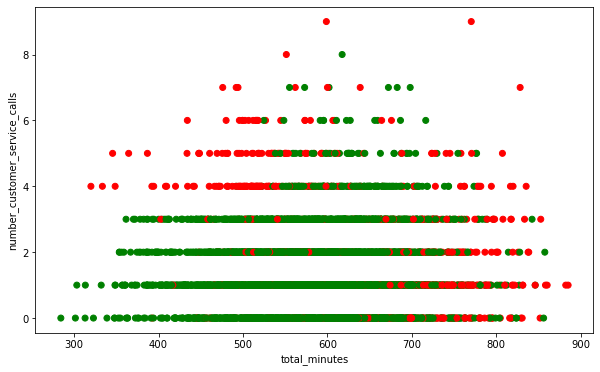

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df["total_minutes"], df["number_customer_service_calls"], c=df["churned"].map({False:"green", True:"red"}))
plt.xlabel("total_minutes")
plt.ylabel("number_customer_service_calls");

5. Вывести top-5 самых много и самых мало говорящих клиентов

In [29]:
# Мало
df.sort_values("total_minutes").head(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_calls,total_minutes
648,WI,131,415,331-3174,no,yes,39,69.1,122,11.75,...,104.8,94,4.72,9.1,4,2.46,0,False,356,284.3
1233,IL,48,510,380-5246,no,no,0,128.2,71,21.79,...,116.3,80,5.23,8.9,3,2.40,0,False,232,301.5
3779,MN,141,408,362-8044,no,no,0,77.8,123,13.23,...,75.3,65,3.39,5.7,7,1.54,1,False,314,303.2
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,156.6,89,7.05,12.1,1,3.27,0,False,273,313.0
992,MI,45,510,375-8934,no,yes,26,91.7,104,15.59,...,63.3,103,2.85,7.7,5,2.08,1,False,331,313.3


In [30]:
# Много
df.sort_values("total_minutes", ascending=False).head(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned,total_calls,total_minutes
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,275.4,102,12.39,13.3,9,3.59,1,True,245,885.0
289,OK,89,510,352-6976,no,no,0,303.9,95,51.66,...,312.1,89,14.04,5.3,3,1.43,1,True,301,882.2
3205,MS,111,408,345-3787,no,no,0,294.7,90,50.10,...,260.1,121,11.70,10.8,3,2.92,1,True,286,860.2
4991,AZ,97,510,410-3888,no,no,0,252.6,89,42.94,...,256.5,67,11.54,8.8,5,2.38,1,True,252,858.2
4271,MO,103,415,370-4667,no,yes,37,230.7,112,39.22,...,299.4,77,13.47,7.9,3,2.13,2,False,308,857.4


6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [33]:
df[["state", "total_day_charge", "churned"]].groupby("state").mean()

,total_day_charge,churned
state,,
AK,30.763333,0.069444
AL,32.210887,0.104839
AR,29.782065,0.173913
AZ,29.998315,0.101124
CA,29.399038,0.269231
CO,29.990521,0.114583
CT,29.848384,0.161616
DC,29.313068,0.102273
DE,31.203085,0.159574


7. перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [34]:
df = pd.get_dummies(df, columns=["state"])

In [35]:
df.head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y = df["churned"]
X = df.drop(columns=["churned", "area_code", "phone_number", "international_plan", "voice_mail_plan", "total_minutes"])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas (в случае спарка - не надо)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [121]:
clf = RandomForestClassifier(max_depth = 20)

In [122]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [123]:
predict = clf.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [129]:
accuracy = accuracy_score(predict, y_test)
print(f"accuracy: {round(accuracy, 3)}")

accuracy: 0.926


In [130]:
precision = precision_score(predict, y_test)
print(f"precision: {round(precision, 3)}")

precision: 0.504


In [131]:
recall = recall_score(predict, y_test)
print(f"recall: {round(recall, 3)}")

recall: 0.933


In [132]:
f1 = f1_score(predict, y_test)
print(f"f1: {round(f1, 3)}")

f1: 0.654
